In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [4]:
dataset=pd.read_csv("Geneva Ionomics_Y_Spec_as_int.csv")

In [6]:
dataset[0:191]

,IVNO,Spec_int,B11,Na23,Mg26,Al27,P31,S34,K39,Ca44,...,Mn55,Co59,Ni60,Cu63,Zn66,As75,Rb85,Sr88,Mo98,Cd111
0,318684,1,91.828727,79.436022,1912.748061,5.882495,3371.070360,2574.706720,9940.165174,14466.398220,...,438.453718,0.182502,0.579481,27.983088,78.413561,0.006585,4.862209,22.391683,0.413514,0.023319
1,588141,1,58.206022,40.652580,1566.902969,5.856940,3544.081320,2189.611721,9653.263267,8230.550570,...,236.212667,0.091406,0.244903,23.983944,54.923095,0.009040,2.714895,13.824099,0.304084,0.020963
2,588646,1,63.901449,57.636087,2274.547638,6.819170,5495.366871,2614.728325,13967.897580,12394.611400,...,259.690236,0.086835,0.519297,41.153569,58.575073,0.004803,2.461506,14.488620,0.401304,0.068518
3,588378,1,72.839573,72.563357,1190.390687,5.091528,3078.075354,1765.972055,7978.410800,6200.788479,...,319.173261,0.111687,0.236068,14.949782,70.747574,0.009075,2.569614,6.336153,0.178760,0.015922
4,1583,1,66.850648,34.508112,2073.380089,8.013734,5045.403214,2840.104738,10526.677260,8710.188433,...,329.646304,0.132229,0.490120,69.027881,74.561963,0.017069,2.169312,9.098213,0.101519,0.024884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,588229,7,88.152049,51.659508,3067.418838,7.542167,6291.927723,2584.935141,18574.438960,9368.200535,...,196.582684,0.064869,0.217294,57.707899,62.067868,0.009959,2.407723,10.744682,0.459142,0.017632
187,588223,7,54.198372,47.529646,2488.757927,11.560428,5502.411331,2430.181886,14902.138960,8773.805812,...,488.745217,0.187759,0.731063,104.345567,119.052014,0.008278,5.350055,7.522837,0.092471,0.024551
188,588231,7,121.737011,85.540208,1858.926998,7.889433,4142.061981,2414.080308,12225.963010,8822.047945,...,273.905950,0.104851,0.468825,67.707001,59.827720,0.015546,2.013465,8.591915,0.229233,0.024540
189,588395,7,663.592149,-124.560805,517.517791,3708.321889,-2701.951735,-516890.218700,459.932733,1374.642842,...,9.809959,0.134617,-17.673917,-28.002645,-89.202671,2.355134,9.869326,7.368190,0.317233,-0.714952


In [7]:
dataset.drop([189,], inplace = True) 

In [8]:
dataset[0:190]

,IVNO,Spec_int,B11,Na23,Mg26,Al27,P31,S34,K39,Ca44,...,Mn55,Co59,Ni60,Cu63,Zn66,As75,Rb85,Sr88,Mo98,Cd111
0,318684,1,91.828727,79.436022,1912.748061,5.882495,3371.070360,2574.706720,9940.165174,14466.398220,...,438.453718,0.182502,0.579481,27.983088,78.413561,0.006585,4.862209,22.391683,0.413514,0.023319
1,588141,1,58.206022,40.652580,1566.902969,5.856940,3544.081320,2189.611721,9653.263267,8230.550570,...,236.212667,0.091406,0.244903,23.983944,54.923095,0.009040,2.714895,13.824099,0.304084,0.020963
2,588646,1,63.901449,57.636087,2274.547638,6.819170,5495.366871,2614.728325,13967.897580,12394.611400,...,259.690236,0.086835,0.519297,41.153569,58.575073,0.004803,2.461506,14.488620,0.401304,0.068518
3,588378,1,72.839573,72.563357,1190.390687,5.091528,3078.075354,1765.972055,7978.410800,6200.788479,...,319.173261,0.111687,0.236068,14.949782,70.747574,0.009075,2.569614,6.336153,0.178760,0.015922
4,1583,1,66.850648,34.508112,2073.380089,8.013734,5045.403214,2840.104738,10526.677260,8710.188433,...,329.646304,0.132229,0.490120,69.027881,74.561963,0.017069,2.169312,9.098213,0.101519,0.024884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,588225,7,43.094940,23.013778,1509.670683,5.014831,5713.327570,2717.273894,15834.731490,8498.744848,...,173.050536,0.070493,0.499101,67.773324,66.382576,0.006042,3.331940,8.534732,0.236754,0.016106
186,588229,7,88.152049,51.659508,3067.418838,7.542167,6291.927723,2584.935141,18574.438960,9368.200535,...,196.582684,0.064869,0.217294,57.707899,62.067868,0.009959,2.407723,10.744682,0.459142,0.017632
187,588223,7,54.198372,47.529646,2488.757927,11.560428,5502.411331,2430.181886,14902.138960,8773.805812,...,488.745217,0.187759,0.731063,104.345567,119.052014,0.008278,5.350055,7.522837,0.092471,0.024551
188,588231,7,121.737011,85.540208,1858.926998,7.889433,4142.061981,2414.080308,12225.963010,8822.047945,...,273.905950,0.104851,0.468825,67.707001,59.827720,0.015546,2.013465,8.591915,0.229233,0.024540


In [9]:
dataset= dataset.iloc[:, 1:]

In [10]:
genotype = pd.get_dummies(dataset, drop_first = True)

In [11]:
dataset.isnull().values.any()

False

In [12]:
dataset.isnull().sum().sum()

0

In [13]:
new_dataset = pd.concat([genotype, dataset], axis = 1)

In [14]:
X= new_dataset.iloc[:, :].values

In [15]:
sc= StandardScaler()
X= sc.fit_transform(X)


In [16]:
wss=[]
for i in range (1,11):
    kmeanscluster = KMeans(n_clusters = i, init = 'k-means++')
    kmeanscluster.fit(X)
    kmeanscluster.inertia_
    wss.append(kmeanscluster.inertia_)
    

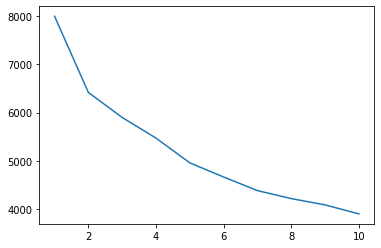

In [17]:
plt.plot(range(1,11), wss)

In [18]:
kmeanscluster = KMeans(n_clusters= 5, init = 'k-means++')
kmeanscluster.fit(X)
Y_pred = kmeanscluster.predict(X)

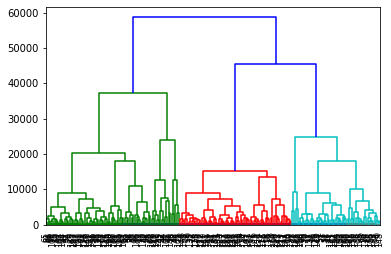

In [39]:
dendogram = sch.dendrogram(sch.linkage(X, method= 'ward', metric = 'euclidean'))
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dataset, 'ward')
h =hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=dataset.index)
plt.savefig("dendogram Y")

In [38]:
cluster= AgglomerativeClustering(n_clusters  = 5)

In [21]:
cluster.fit(X)
Y_pred_dendrogram = cluster.fit_predict(X)

In [1]:
dataset[]

NameError: name 'dataset' is not defined